# Chapter 5 - Biased transmission: demonstrator-based indirect bias

In [3]:
import numpy as np 
rng = np.random.default_rng()

import pandas as pd

In [38]:
def plot_multiple_runs(data_model):
    groups = data_model.groupby("run")
    for _, g in groups:
        g.index = g["generation"]
        g["p"].plot(lw=.5, ylim=(0,1))

    data_model.groupby("generation")["p"].mean().plot(c="k", lw="1")

In [2]:
N = 100
p_0 = 0.5
p_s = 0.05

In [4]:
population = pd.DataFrame({
    "trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1-p_0]),
    "status": rng.choice(["high", "low"], size=N, replace=True, p=[p_s, 1-p_s])
})

In [5]:
population

,trait,status
0,A,low
1,A,low
2,A,low
3,B,low
4,B,low
...,...,...
95,A,low
96,A,low
97,B,low
98,A,low


In [6]:
p_low = 0.01
p_demonstrator = np.ones(N)
p_demonstrator[ population["status"] == "low" ] = p_low

In [33]:
if sum(p_demonstrator) > 0:
    ps = p_demonstrator / p_demonstrator.sum()
    demonstrator_index = rng.choice(np.arange(N), size=N, p=ps, replace=True)
    population["trait"] = population.loc[demonstrator_index, "trait"].values

In [36]:
def biased_transmission_demonstrator(N, p_0, p_s, p_low, t_max, r_max):
    # Create the output DataFrame
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })
    
    for r in range(r_max):
            # Create first generation
            population = pd.DataFrame({
                "trait": rng.choice(["A", "B"], size=N, replace=True, p=[p_0, 1-p_0]),
                "status": rng.choice(["high", "low"], size=N, replace=True, p=[p_s, 1-p_s])
            })
            
            # Assign copying probabilities based on individuals' status
            p_demonstrator = np.ones(N)
            p_demonstrator[population["status"] == "low"] = p_low
            
            # Add first generation's p for run r
            output.loc[ r * t_max, "p"] = population[ population["trait"] == "A" ].shape[0] / N
            
            for t in range(1, t_max):
                # Copy individuals to previous_population DataFrame
                previous_population = population.copy()
                
                # Copy traits based on status
                if sum(p_demonstrator) > 0:
                    ps = p_demonstrator / p_demonstrator.sum()
                    demonstrator_index = rng.choice(np.arange(N), size=N, p=ps, replace=True)
                    population["trait"] = population.loc[demonstrator_index, "trait"].values
                
                # Get p and put it into output slot for this generation t and run r
                output.loc[r * t_max + t, "p"] = population[ population["trait"] == "A" ].shape[0] / N
                
    return output
                

In [40]:
data_model = biased_transmission_demonstrator(N=100, p_s=0.05, p_low=0.0001, p_0=0.5, t_max=50, r_max=10)

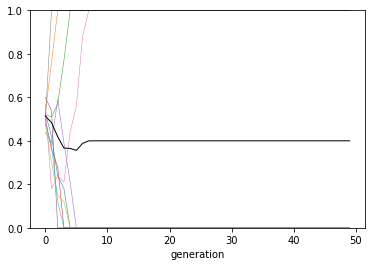

In [41]:
plot_multiple_runs(data_model)

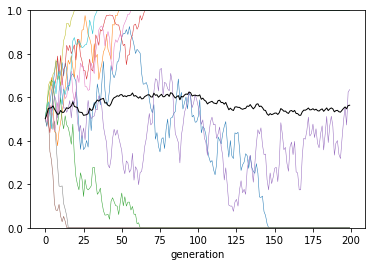

In [42]:
data_model = biased_transmission_demonstrator(N=10_000, p_s=0.005, p_low=0.0001, p_0=0.5, t_max=200, r_max=10)
plot_multiple_runs(data_model)

In [55]:
def biased_transmission_demonstrator_2(N, p_0, p_s, p_low, t_max, r_max):
    # Create the output DataFrame
    output = pd.DataFrame({
        "generation" : np.tile(np.arange(t_max), r_max),
        "p" : [ np.nan ] * t_max * r_max,
        "run" : np.repeat(np.arange(r_max), t_max)
    })
    
    ...
    
    return output

In [56]:
data_model = biased_transmission_demonstrator_2(N=100, p_s=0.1, p_low=0.0001, p_0=0.5, t_max=50, r_max=50)